In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_csv("Mall_Customers - Mall_Customers.csv")

In [97]:
df.shape

(200, 5)

In [98]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [99]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [100]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [102]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [103]:
df.isnull().sum().sort_values(ascending=False)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [104]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Genre']

In [105]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [106]:
# renaming the column
if 'Genre' in df.columns and 'Gender' not in df.columns:
    df = df.rename(columns={'Genre': 'Gender'})

In [107]:
# featuere engineering and selection
x=df.iloc[:,[3,4]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [108]:
# scaling the input feature data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:5]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918]])

In [109]:
x = pd.DataFrame(x_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
x.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


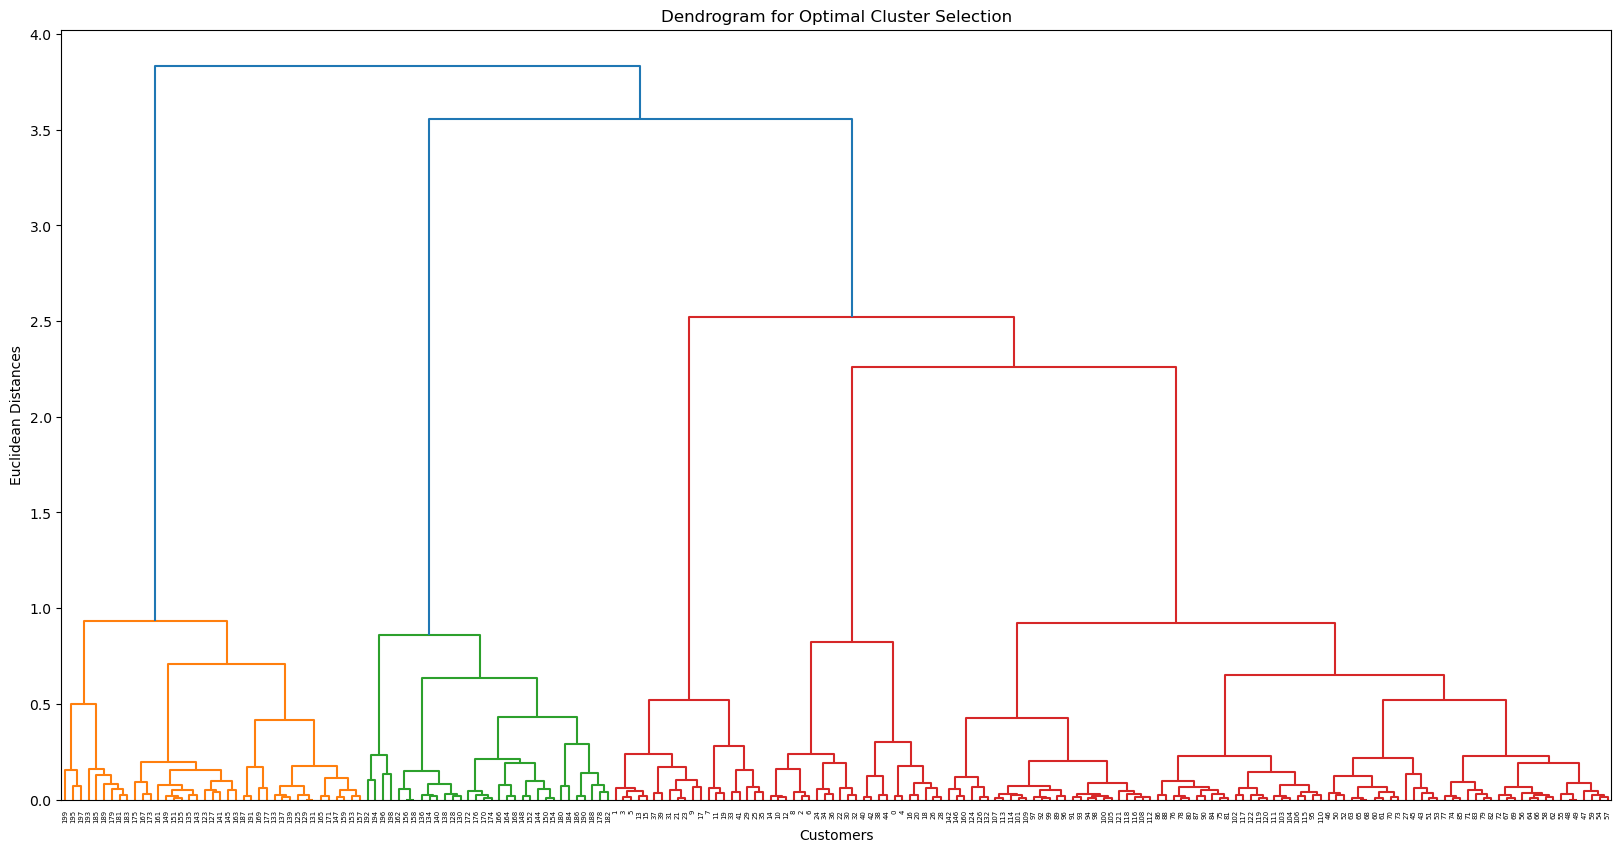

In [110]:
# Dendrogram to find optimal number of clusters
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20, 10))
linkage_matrix = linkage(x_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Optimal Cluster Selection")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

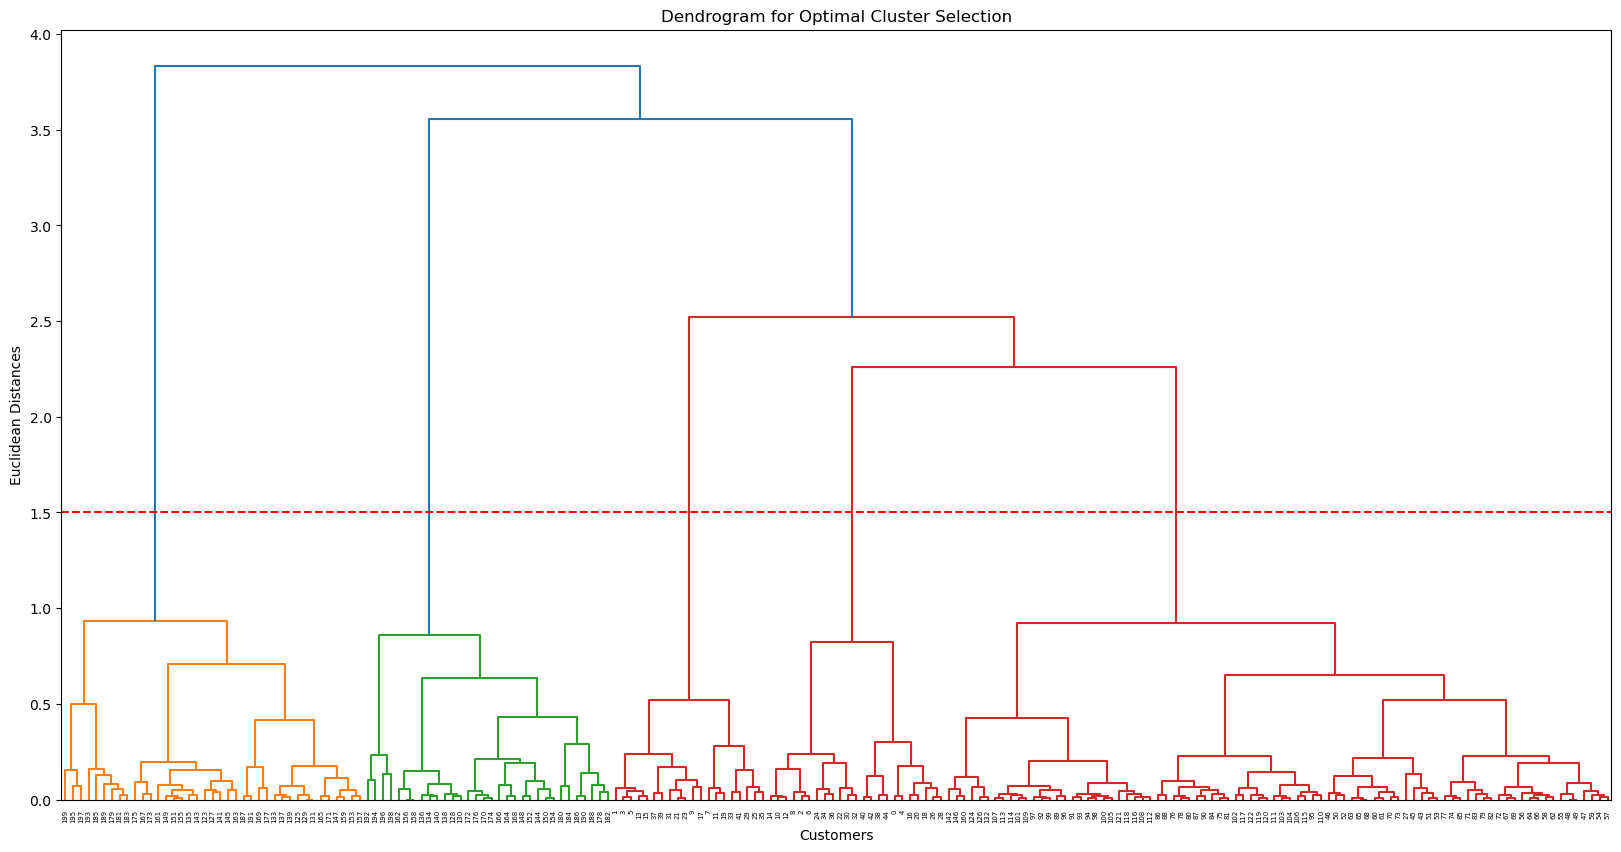

In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20, 10))
linkage_matrix = linkage(x_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Optimal Cluster Selection")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.axhline(y=1.5,color='r',linestyle='--')
plt.show()

In [112]:
#Applying Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(x_scaled)

In [114]:
#Adding Cluster Labels to the Original Data
x["label"] = y_hc
x.head()

,Annual Income (k$),Spending Score (1-100),label
0,0.000000,0.387755,4
1,0.000000,0.816327,3
2,0.008197,0.051020,4
3,0.008197,0.775510,3
4,0.016393,0.397959,4


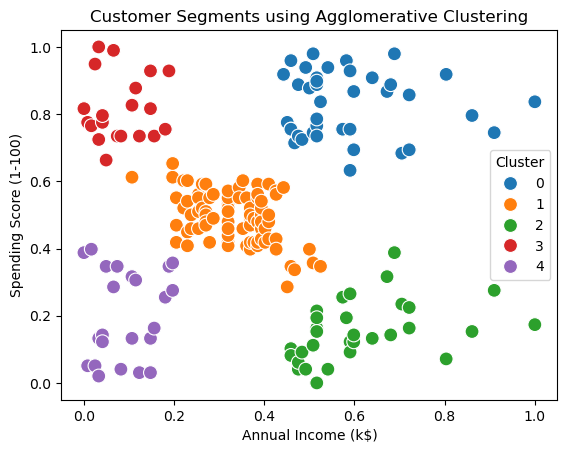

In [115]:
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1],hue=x["label"],palette='tab10',s=100)
plt.title("Customer Segments using Agglomerative Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()
